# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     784.9
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           1.71e-39
Time:                        11:06:25   Log-Likelihood:                -1.9859
No. Observations:                  50   AIC:                             11.97
Df Residuals:                      46   BIC:                             19.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1004      0.089     57.008      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.66666966  5.1481367   5.58738733  5.9539721   6.22843061  6.40548878
  6.49492541  6.5199655   6.51346449  6.51251017  6.55232929  6.66049989
  6.8524203   7.12877926  7.47544273  7.86577612  8.26502021  8.63600206
  8.94524238  9.16845609  9.29454229  9.32740812  9.28532679  9.1979354
  9.1013656   9.03230728  9.02198053  9.09100626  9.24601825  9.47857322
  9.76653806 10.07772624 10.37518593 10.62327112 10.79349814 10.86922546
 10.84838781 10.74383555 10.58122336 10.39479524 10.22175836 10.09616998
 10.04334197 10.07568211 10.19065557 10.37120135 10.58853534 10.80687949
 10.98934006 11.1039691 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.12118767 10.99337247 10.74243418 10.41830445 10.08671091  9.81308472
  9.6465408   9.60785272  9.68436664  9.83309941]


## Plot comparison

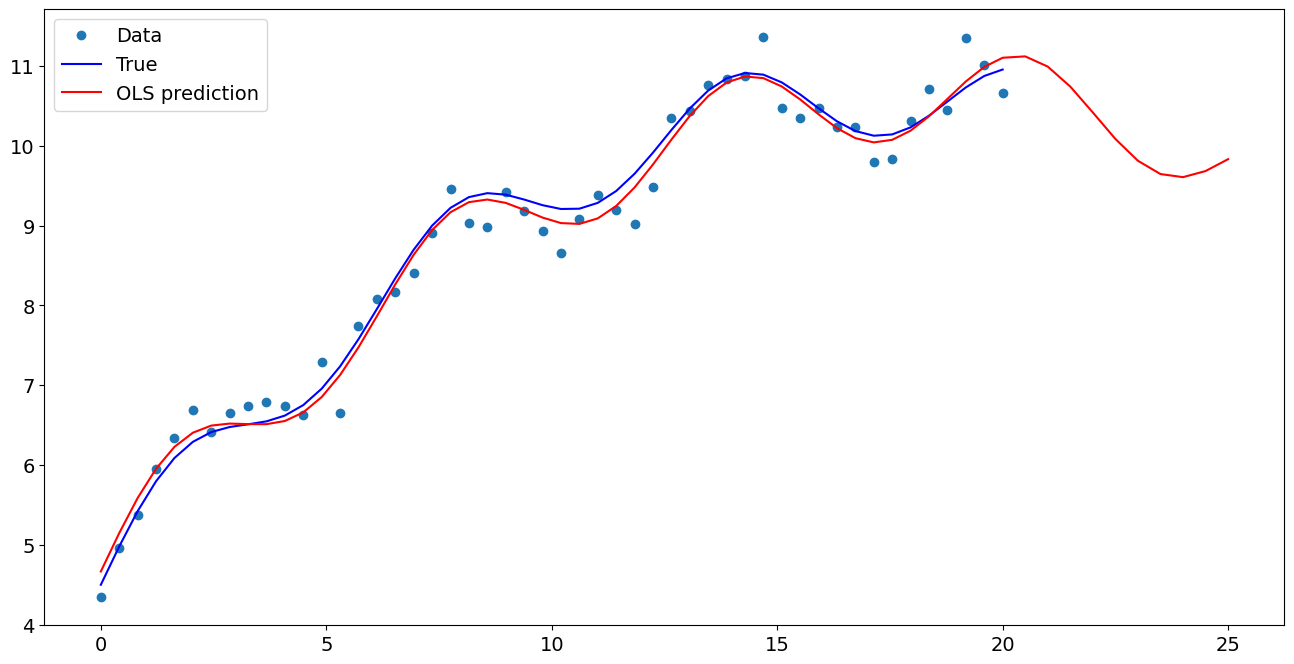

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.100400
x1                  0.469853
np.sin(x1)          0.558715
I((x1 - 5) ** 2)   -0.017349
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.121188
1    10.993372
2    10.742434
3    10.418304
4    10.086711
5     9.813085
6     9.646541
7     9.607853
8     9.684367
9     9.833099
dtype: float64